In [1]:
from matplotlib import pyplot as plt
import DND_Functions as dndf
import numpy as np
from collections import Counter
from collections import OrderedDict

%matplotlib inline

In [ ]:
value_counts = Counter(final_vals1)
total_counts = sum([x for x in value_counts.values])

In [ ]:
sim_damage_results1

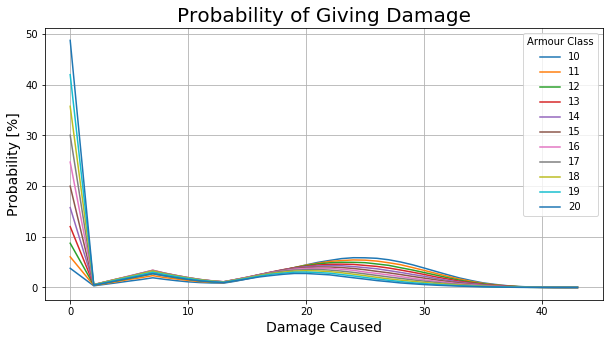

In [12]:
n = 1e6
acs = np.arange(10, 21, 1)

actions_sword1 = {}
actions_sword1['hit'] = 7
actions_sword1['longbow'] = '1d8'
actions_sword1['prof'] = 3
actions_sword1['sneak_attack'] = '1d6'
actions_sword1['hunters_mark'] = '1d6'
actions_sword1['colossus_slayer'] = '1d8'

actions_sword2 = {}
actions_sword2['hit'] = 5
actions_sword2['shortsword'] = '1d6'
actions_sword2['prof'] = 0
actions_sword2['hunters_mark'] = '1d6'
# actions_sword1['sneak_attack'] = '1d6'
# actions_sword1['colossus_slayer'] = '1d8'

plt.figure(figsize=(10, 5), facecolor='white')

for ac in acs:

    sim_damage_results1 = dndf.MonteCarloAttack(actions_sword1, ac, n=n)
    sim_damage_results2 = dndf.MonteCarloAttack(actions_sword2, ac, n=n)
    sim_damage_results = sim_damage_results1 + sim_damage_results2
    
#     sim_damage_results = sim_damage_results[sim_damage_results > 0]
    frequency_dict = dndf.ReturnFrequencies(sim_damage_results)

    dndf.PlotFrequencies(frequency_dict, label=ac, markersize=0)

plt.xlabel('Damage Caused', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage', fontsize=20)
plt.legend(loc='best', title='Armour Class')
plt.grid(True)

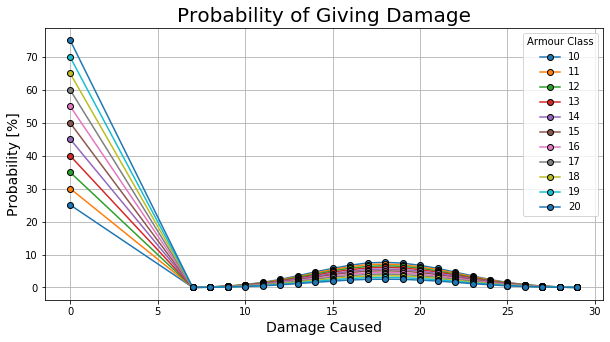

In [11]:
n = 1e6
acs = np.arange(10, 21, 1)

actions = OrderedDict()
actions['hit'] = 5
actions['shortsword'] = '1d6'
actions['prof'] = 3
actions['sneak_attack'] = '1d6'
actions['hunters_mark'] = '1d6'
actions['colossus_slayer'] = '1d8'

plt.figure(figsize=(10, 5), facecolor='white')

for ac in acs:

    sim_damage_results = dndf.MonteCarloAttack(actions, ac, n=n)
#     sim_damage_results = sim_damage_results[sim_damage_results > 0]
    frequency_dict = dndf.ReturnFrequencies(sim_damage_results)

    dndf.PlotFrequencies(frequency_dict, label=ac)

plt.xlabel('Damage Caused', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage', fontsize=20)
plt.legend(loc='best', title='Armour Class')
plt.grid(True)

10.451166 11.258827
9.915442463170466 10.066595133612507


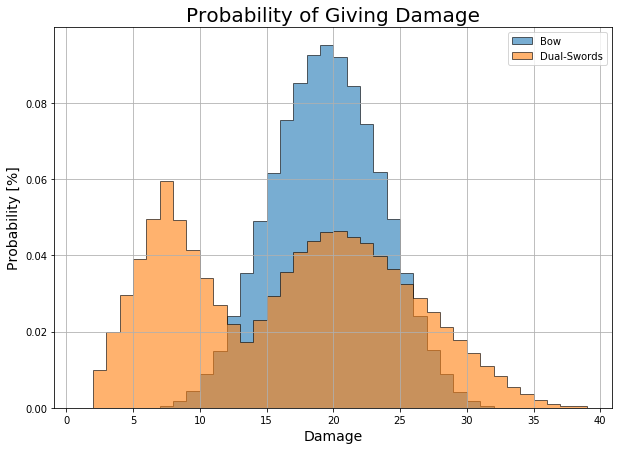

In [22]:
n = 1e6
AC = 16
label = ['Bow', 'Dual-Swords']

fig = plt.figure(figsize=(10, 7), facecolor='white')

actions = OrderedDict()
actions['hit'] = 7
actions['longbow'] = '1d8'
actions['prof'] = 3
actions['sneak_attack'] = '1d6'
actions['hunters_mark'] = '1d6'
actions['colossus_slayer'] = '1d8'

final_vals1 = dndf.MonteCarloAttack(actions, AC, n=n)

actions = OrderedDict()
actions['hit'] = 5
actions['shortsword'] = '1d6'
actions['prof'] = 3
actions['sneak_attack'] = '1d6'
actions['hunters_mark'] = '1d6'
actions['colossus_slayer'] = '1d8'

final_vals2 = dndf.MonteCarloAttack(actions, AC, n=n)

actions = OrderedDict()
actions['hit'] = 5
actions['shortsword'] = '1d6'
actions['prof'] = 0
actions['hunters_mark'] = '1d6'

final_vals3 = dndf.MonteCarloAttack(actions, AC, n=n)
final_vals2 = final_vals2 + final_vals3

bins = np.arange(1, 40, 1)

# plt.subplot(2,1,1)
plt.hist(final_vals1, bins=bins, edgecolor='k', alpha=0.6, label=label[0], density=True, histtype='stepfilled')
plt.hist(final_vals2, bins=bins, edgecolor='k', alpha=0.6, label=label[1], density=True, histtype='stepfilled')
plt.grid(True)
plt.xlabel('Damage', fontsize=14)
plt.ylabel('Probability [%]', fontsize=14)
plt.title('Probability of Giving Damage', fontsize=20)
plt.legend(loc='best')

print(np.mean(final_vals1), np.mean(final_vals2))
print(np.std(final_vals1), np.std(final_vals2))

In [23]:
fig.savefig('test.png', dps=200)